<a href="https://colab.research.google.com/github/kungfumas/stbi/blob/master/klasifikasi_pengolahan_teksv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://towardsdatascience.com/create-a-simple-search-engine-using-python-412587619ff5
https://medium.com/@deangela.neves/how-to-build-a-search-engine-from-scratch-in-python-part-1-96eb240f9ecb

https://towardsdatascience.com/how-to-build-a-search-engine-9f8ffa405eac

In [12]:
!pip install bs4

In [13]:
import requests
from bs4 import BeautifulSoup# Make a request to the website
r = requests.get('https://bola.kompas.com/')# Create an object to parse the HTML format
soup = BeautifulSoup(r.content, 'html.parser')# Retrieve all popular news links (Fig. 1)
link = []
for i in soup.find('div', {'class':'most__wrap'}).find_all('a'):
    i['href'] = i['href'] + '?page=all'
    link.append(i['href'])# For each link, we retrieve paragraphs from it, combine each paragraph as one string, and save it to documents (Fig. 2)
documents = []
for i in link:
    # Make a request to the link
    r = requests.get(i)

    # Initialize BeautifulSoup object to parse the content
    soup = BeautifulSoup(r.content, 'html.parser')

    # Retrieve all paragraphs and combine it as one
    sen = []
    for i in soup.find('div', {'class':'read__content'}).find_all('p'):
        sen.append(i.text)

    # Add the combined paragraphs to documents
    documents.append(' '.join(sen))

In [14]:
documents

['KOMPAS.com - Timnas Spanyol merayakan kemenangan 1-0 atas rival mereka, Timnas Italia, pada laga big match Grup B Euro 2024. Pertandingan Spanyol vs Italia berlangsung di Stadion Arena AufSchale di Gelsenkirchen pada Kamis (20/6/2024) atau Jumat dini hari WIB. Pertandingan ditentukan oleh gol bunuh diri bek Italia Riccardo Calafiori pada menit ke-55. Azzurri bisa saja kalah lebih besar apabila bukan karena kiper Gianluigi Donnarumma yang menorehkan delapan penyelamatan sepanjang laga. Spanyol memulai laga dengan positif dan melakukan sirkulasi bola dengan bagus. Pertandingan baru berjalan dua menit saat Pedri memaksa Donnarumma untuk menyelamatkan tandukannya. Donnarumma kembali menjadi protagonis di laga ketika ia terbang ke arah kirinya demi menepis tembakan roket Fabian Ruiz yang melaju dengan kecepatan 118 km/jam. Baca juga: Pembelaan Southgate dan Walker Soal Alasan Inggris Bertahan Dalam Tak ada kesempatan besar lain tercipta setelah itu dan laga babak pertama pun berakhir 0-0.

In [15]:
pip install sastrawi

In [16]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stem
sentence = 'Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan'
output   = stemmer.stem(sentence)

print(output)
# ekonomi indonesia sedang dalam tumbuh yang bangga

ekonomi indonesia sedang dalam tumbuh yang bangga


In [17]:
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
lower_case = kalimat.lower()
print(lower_case)

berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan, jepang, singapura, hong kong, dan finlandia.


In [18]:
import re # impor modul regular expression
kalimat = "Berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia."
hasil = re.sub(r"\d+", "", kalimat)
print(hasil)

Berikut ini adalah  negara dengan pendidikan terbaik di dunia adalah Korea Selatan, Jepang, Singapura, Hong Kong, dan Finlandia.


In [19]:
import re
def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()


        return document

In [20]:
preprocess_text(kalimat)

'berikut ini adalah 5 negara dengan pendidikan terbaik di dunia adalah korea selatan jepang singapura hong kong dan finlandia '

In [21]:
kalimat = "rumah idaman adalah rumah yang bersih"
pisah = kalimat.split()
print(pisah)

['rumah', 'idaman', 'adalah', 'rumah', 'yang', 'bersih']


In [22]:
pip install nltk

In [27]:
import nltk
from nltk.tokenize import word_tokenize

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online."

tokens = nltk.tokenize.word_tokenize(kalimat)
print(tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [28]:
import nltk
from nltk.tokenize import word_tokenize

# Download the 'punkt' resource
nltk.download('punkt')

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online."

tokens = nltk.tokenize.word_tokenize(kalimat)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Andi', 'kerap', 'melakukan', 'transaksi', 'rutin', 'secara', 'daring', 'atau', 'online', '.']


In [29]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis & murah."
kalimat = kalimat.translate(str.maketrans('','')).lower()

tokens = nltk.tokenize.word_tokenize(kalimat)
kemunculan = nltk.FreqDist(tokens)
print(kemunculan.most_common())

[('andi', 2), ('online', 2), ('.', 2), ('kerap', 1), ('melakukan', 1), ('transaksi', 1), ('rutin', 1), ('secara', 1), ('daring', 1), ('atau', 1), ('menurut', 1), ('belanja', 1), ('lebih', 1), ('praktis', 1), ('&', 1), ('murah', 1)]


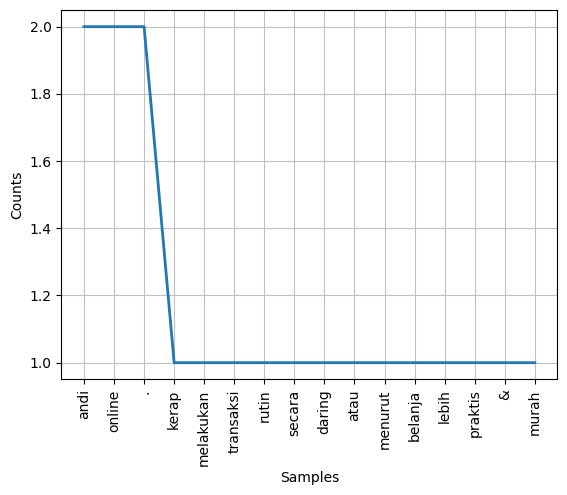

In [30]:
import matplotlib.pyplot as plt
kemunculan.plot(30,cumulative=False)
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import pandas as pd
# set of documents
train = ['The sky is blue.','The sun is bright.']
test = ['The sun in the sky is bright', 'We can see the shining sun, the bright sun.']
# instantiate the vectorizer object
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
# convert th documents into a matrix
count_wm = countvectorizer.fit_transform(train)
tfidf_wm = tfidfvectorizer.fit_transform(train)
#retrieve the terms found in the corpora
# if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
#count_tokens = tfidfvectorizer.get_feature_names() # no difference
count_tokens = countvectorizer.get_feature_names_out() # Use get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out() # Use get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),index = ['Doc1','Doc2'],columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),index = ['Doc1','Doc2'],columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      blue  bright  sky  sun
Doc1     1       0    1    0
Doc2     0       1    0    1

TD-IDF Vectorizer

          blue    bright       sky       sun
Doc1  0.707107  0.000000  0.707107  0.000000
Doc2  0.000000  0.707107  0.000000  0.707107


In [33]:
import pandas as pd

columns = ['kalimat', 'label']
rows = []

rows = [['Ini buku-buku saya', 'berita'],
        ['Buku-buku saya merupakan novel', 'berita'],
        ['apakah kamu sudah membaca buku-buku itu?', 'pertanyaan'],
        ['siapakah pengarang buku tersebut?', 'pertanyaan'],
        ['siapa saja yang ada di buku tersebut?', 'pertanyaan'],
        ['Saya membeli buku tersebut secara online', 'berita'],
        ['Saya suka membaca buku cerita', 'berita'],
        ['Apakah buku kesukaanmu?', 'pertanyaan'],
       ['Membeli buku secara online lebih mudah', 'berita'],
        ['Buku cerita sangat menghibur', 'berita'],
        ['apakah kamu suka buku cerita?', 'pertanyaan']]

training_data = pd.DataFrame(rows, columns=columns)
training_data

,kalimat,label
0,Ini buku-buku saya,berita
1,Buku-buku saya merupakan novel,berita
2,apakah kamu sudah membaca buku-buku itu?,pertanyaan
3,siapakah pengarang buku tersebut?,pertanyaan
4,siapa saja yang ada di buku tersebut?,pertanyaan
5,Saya membeli buku tersebut secara online,berita
6,Saya suka membaca buku cerita,berita
7,Apakah buku kesukaanmu?,pertanyaan
8,Membeli buku secara online lebih mudah,berita
9,Buku cerita sangat menghibur,berita


In [34]:
#mengubah label kelas berita=0 dan yang lain menjadi =1
training_data['labelkelas'] = training_data['label'].apply(lambda x: 0 if x=='berita' else 1)
training_data


,kalimat,label,labelkelas
0,Ini buku-buku saya,berita,0
1,Buku-buku saya merupakan novel,berita,0
2,apakah kamu sudah membaca buku-buku itu?,pertanyaan,1
3,siapakah pengarang buku tersebut?,pertanyaan,1
4,siapa saja yang ada di buku tersebut?,pertanyaan,1
5,Saya membeli buku tersebut secara online,berita,0
6,Saya suka membaca buku cerita,berita,0
7,Apakah buku kesukaanmu?,pertanyaan,1
8,Membeli buku secara online lebih mudah,berita,0
9,Buku cerita sangat menghibur,berita,0


In [ ]:
#memecah data test 30% dari keseluruhan data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data['kalimat'], training_data['labelkelas'], test_size = 0.3,random_state=0)


In [ ]:
X_train

In [ ]:
y_train

In [ ]:
#mengubah menjadi vector term
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)


In [ ]:
X_test_cv[1:1]

In [ ]:
#pembuatan model KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_cv, y_train)
#prediksi menggunakan data test
y_pred = classifier.predict(X_test_cv)
#menghitung confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['pertanyaan', 'berita'], yticklabels=['pertanyaan', 'berita'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_cv,y_train)
    Y_pred_dt = dt.predict(X_test_cv)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_cv,y_train)
Y_pred_dt = dt.predict(X_test_cv)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, Y_pred_dt))
print(classification_report(y_test, Y_pred_dt))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test,Y_pred_dt)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['pertanyaan', 'berita'], yticklabels=['pertanyaan', 'berita'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
import pandas as pd

columns = ['sent', 'class']
rows = []

rows = [['This is my book', 'stmt'],
        ['They are novels', 'stmt'],
        ['have you read this book', 'question'],
        ['who is the author', 'question'],
        ['what are the characters', 'question'],
        ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['what is your favorite book', 'question'],
       ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['what is your favorite book', 'question']]

training_data = pd.DataFrame(rows, columns=columns)
training_data

In [ ]:
training_data['label'] = training_data['class'].apply(lambda x: 0 if x=='stmt' else 1)
training_data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data['sent'], training_data['label'], test_size = 0.3,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_cv)
X_train_cv = scaler.transform(X_train_cv)
X_test_cv = scaler.transform(X_test_cv)

In [ ]:
word_freq = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())
top_words_df = pd.DataFrame(word_freq.sum()).sort_values(0, ascending=False)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Recall score: ', recall_score(y_test, predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['pertanyaan', 'berita'], yticklabels=['pertanyaan', 'berita'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_cv, y_train)

In [ ]:
y_pred = classifier.predict(X_test_cv)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_cv,y_train)

Y_pred_lr = lr.predict(X_test_cv)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train_cv, y_train)

In [ ]:
Y_pred_svm = sv.predict(X_test_cv)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

In [ ]:
Y_pred_svm.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_cv,y_train)
    Y_pred_dt = dt.predict(X_test_cv)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_cv,y_train)
Y_pred_dt = dt.predict(X_test_cv)

In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
max_accuracy = 0
for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train_cv,y_train)
    Y_pred_rf = rf.predict(X_test_cv)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_cv,y_train)
Y_pred_rf = rf.predict(X_test_cv)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_cv, y_train)

Y_pred_xgb = xgb_model.predict(X_test_cv)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

In [ ]:
scores = [score_lr,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

In [ ]:
import numpy as np
import pandas as pd

# for performing text clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# for providing the path
import os
print(os.listdir('../input/'))

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [ ]:
import pandas as pd

columns = ['sent', 'class']
rows = []

rows = [['This is my book', 'stmt'],
        ['They are novels', 'stmt'],
        ['have you read this book', 'question'],
        ['who is the author', 'question'],
        ['what are the characters', 'question'],
        ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['what is your favorite book', 'question'],
       ['This is how I bought the book', 'stmt'],
        ['I like fictions', 'stmt'],
        ['what is your favorite book', 'question']]

training_data = pd.DataFrame(rows, columns=columns)
training_data

In [ ]:
training_data['length'] = training_data['sent'].apply(len)

In [ ]:
training_data.head()

In [ ]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(training_data['length'], color = 'purple')
plt.title('The Distribution of Length over the Texts', fontsize = 20)

In [ ]:
# wordcloud

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan',
                      width = 1200,
                      height = 700).generate(str(training_data['sent']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.title("WordCloud ", fontsize = 20)

In [ ]:


cv = CountVectorizer()
words = cv.fit_transform(training_data['sent'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [ ]:
print("Shape of X :", words.shape)

In [ ]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

In [ ]:

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")
Y = cv.transform(["you read this book"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["what is favorite book"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster



documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(documents).todense()
# transform the data matrix into pairwise distances list
dist_array = pdist(X)
# calculate hierarchy
#Z = linkage(dist_array, 'ward')
#plt.title("Ward")
#dendrogram(Z, labels=labels)

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Nomor Dokumen')
plt.ylabel('Jarak Euclidean')
plt.show()


from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
print(cluster.labels_)

In [ ]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Reading the country file on which analysis needs to be done

df_country = pd.read_csv('../input/country-data/country-data.csv')

df_country.head()

# Reading the data dictionary file

df_structure = pd.read_csv('../input/data_dictionary/data-dictionary.csv')
df_structure.head(10)

df_country.shape

df_country.describe()

df_country.info()

# Calculating the Missing Values % contribution in DF

df_null = df_country.isna().mean()*100
df_null

# Datatype check for the dataframe

df_country.dtypes

# Duplicates check

df_country.loc[df_country.duplicated()]

# Segregation of Numerical and Categorical Variables/Columns

cat_col = df_country.select_dtypes(include = ['object']).columns
num_col = df_country.select_dtypes(exclude = ['object']).columns

# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))
ax = sns.heatmap(df_country.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Pairplot of all numeric columns

sns.pairplot(df_country)

# Converting exports,imports and health spending percentages to absolute values.

df_country['exports'] = df_country['exports'] * df_country['gdpp']/100
df_country['imports'] = df_country['imports'] * df_country['gdpp']/100
df_country['health'] = df_country['health'] * df_country['gdpp']/100

df_country.head(5)

# Dropping Country field as final dataframe will only contain data columns

df_country_drop = df_country.copy()
country = df_country_drop.pop('country')

df_country_drop.head()

# Standarisation technique for scaling

warnings.filterwarnings("ignore")
scaler = StandardScaler()
df_country_scaled = scaler.fit_transform(df_country_drop)

df_country_scaled

pca = PCA(svd_solver='randomized', random_state=42)

# Lets apply PCA on the scaled data

pca.fit(df_country_scaled)

# PCA components created

pca.components_

# Variance Ratio

pca.explained_variance_ratio_

# Variance Ratio bar plot for each PCA components.

ax = plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.xlabel("PCA Components",fontweight = 'bold')
plt.ylabel("Variance Ratio",fontweight = 'bold')

# Scree plot to visualize the Cumulative variance against the Number of components

fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=3, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.93, xmax=8, xmin=0, colors="g", linestyles="--")
plt.xlabel('Number of PCA components')
plt.ylabel('Cumulative Explained Variance')

# Checking which attributes are well explained by the pca components

org_col = list(df_country.drop(['country'],axis=1).columns)
attributes_pca = pd.DataFrame({'Attribute':org_col,'PC_1':pca.components_[0],'PC_2':pca.components_[1],'PC_3':pca.components_[2]})

attributes_pca

# Plotting the above dataframe for better visualization with PC1 and PC2

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_2"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 2",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_2[i]))

# Plotting the above dataframe with PC1 and PC3 to understand the components which explains inflation.

sns.pairplot(data=attributes_pca, x_vars=["PC_1"], y_vars=["PC_3"], hue = "Attribute" ,height=8)
plt.xlabel("Principal Component 1",fontweight = 'bold')
plt.ylabel("Principal Component 3",fontweight = 'bold')

for i,txt in enumerate(attributes_pca.Attribute):
    plt.annotate(txt, (attributes_pca.PC_1[i],attributes_pca.PC_3[i]))

# Building the dataframe using Incremental PCA for better efficiency.

inc_pca = IncrementalPCA(n_components=3)

# Fitting the scaled df on incremental pca

df_inc_pca = inc_pca.fit_transform(df_country_scaled)
df_inc_pca

# Creating new dataframe with Principal components

df_pca = pd.DataFrame(df_inc_pca, columns=["PC_1", "PC_2","PC_3"])
df_pca_final = pd.concat([country, df_pca], axis=1)
df_pca_final.head()

# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (8,6))
ax = sns.heatmap(df_pca_final.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_2')
plt.subplot(1,3,2)
sns.scatterplot(data=df_pca_final, x='PC_1', y='PC_3')
plt.subplot(1,3,3)
sns.scatterplot(data=df_pca_final, x='PC_3', y='PC_2')

# Outlier Analysis

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

# Statstical Outlier treatment for PC_1

Q1 = df_pca_final.PC_1.quantile(0.05)
Q3 = df_pca_final.PC_1.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_1 >= Q1) & (df_pca_final.PC_1 <= Q3)]

# Statstical Outlier treatment for PC_2

Q1 = df_pca_final.PC_2.quantile(0.05)
Q3 = df_pca_final.PC_2.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_2 >= Q1) & (df_pca_final.PC_2 <= Q3)]

# Statstical Outlier treatment for PC_3

Q1 = df_pca_final.PC_3.quantile(0.05)
Q3 = df_pca_final.PC_3.quantile(0.95)
IQR = Q3 - Q1
df_pca_final = df_pca_final[(df_pca_final.PC_3 >= Q1) & (df_pca_final.PC_3 <= Q3)]

# Plot after Outlier removal

outliers = ['PC_1','PC_2','PC_3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df_pca_final[outliers], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("PC Components", fontweight = 'bold')

# Reindexing the df after outlier removal

df_pca_final = df_pca_final.reset_index(drop=True)
df_pca_final_data = df_pca_final.drop(['country'],axis=1)
df_pca_final.head()

# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0

    return HS

# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(1,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    model_clus.fit(df_pca_final_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(df_pca_final_data)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_pca_final_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {

In [ ]:
error = []
for i in range(1, 4):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_cv, y_train)
 pred_i = knn.predict(X_test_cv)
 #error.append(np.mean(pred_i != y_test))